In [1]:
#importar las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from google.colab import files
import plotly.graph_objects as go

In [16]:
dataset=  pd.read_csv('fifa_datos.csv', usecols=[7,27])
dataset

,Overall,Weight
0,94,159lbs
1,94,183lbs
2,92,150lbs
3,91,168lbs
4,91,154lbs
...,...,...
18202,47,134lbs
18203,47,170lbs
18204,47,148lbs
18205,47,154lbs


Ejercicio en Clase
Utilizar Matplot y Plotly para realizar las graficas.

1 Con los datos de Fifa, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE

Debajo 125 Lbs.
125-150
150-175
175 o superior



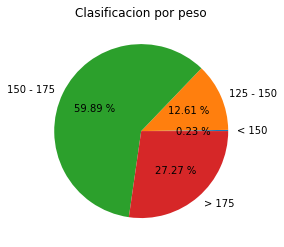

In [26]:
# Generar un grafico de cual es su pie diestro

cat_1 = dataset.loc[dataset['Weight'] < '125'].count()[0]
cat_2 = dataset.loc[(dataset['Weight'] >= '125')&(dataset['Weight'] < '150')].count()[0]
cat_3 = dataset.loc[(dataset['Weight'] >= '150')&(dataset['Weight'] < '175')].count()[0]
cat_4 = dataset.loc[dataset['Weight'] >= '175'].count()[0]

plt.figure()

etiquetas = ['< 150', '125 - 150', '150 - 175', '> 175']

plt.pie([cat_1, cat_2,cat_3,cat_4], labels=etiquetas, autopct='%.2f %%')
plt.title('Clasificacion por peso')
plt.show()

2 Generar un grafico de barras (histograma) de acuerdo a su habilidad (Overall)  en base a los siguientes segmentos contando el número de jugadores

* 40
* 50
* 60
* 70
* 80
* 90

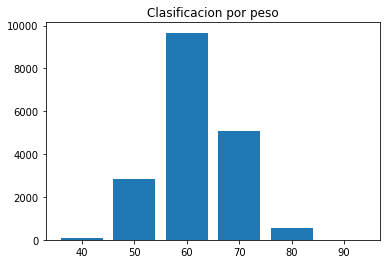

In [38]:
# Generar un grafico de cual es su pie diestro
datos=[]
datos.append(dataset.loc[(dataset['Overall'] >= 40) & (dataset['Overall'] < 50) ].count()[0])
datos.append(dataset.loc[(dataset['Overall'] >= 50) & (dataset['Overall'] < 60) ].count()[0])
datos.append(dataset.loc[(dataset['Overall'] >= 60) & (dataset['Overall'] < 70) ].count()[0])
datos.append(dataset.loc[(dataset['Overall'] >= 70) & (dataset['Overall'] < 80) ].count()[0])
datos.append(dataset.loc[(dataset['Overall'] >= 80) & (dataset['Overall'] < 90) ].count()[0])
datos.append(dataset.loc[(dataset['Overall'] >= 90) ].count()[0])

datos
plt.figure()
etiquetas=['40','50','60','70','80','90']


plt.bar(etiquetas,datos)
plt.title('Clasificacion por peso')
plt.show()

 


3 Investigar alguna herramienta o software que permita generar reportes con Python utilizando CodeLabs.



In [43]:
!pip install fpdf

  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=145047f2fb73946cdbde3035186cf24f4e1f40d133abace9edcd0c2197abc396
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built fpdf


In [45]:
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        # Logo
        
        # Arial bold 15
        self.set_font('Arial', 'B', 15)
        # Move to the right
        self.cell(80)
        # Title
        self.cell(30, 10, 'Title', 1, 0, 'C')
        # Line break
        self.ln(20)

    # Page footer
    def footer(self):
        # Position at 1.5 cm from bottom
        self.set_y(-15)
        # Arial italic 8
        self.set_font('Arial', 'I', 8)
        # Page number
        self.cell(0, 10, 'Page ' + str(self.page_no()) + '/{nb}', 0, 0, 'C')

# Instantiation of inherited class
pdf = PDF()
pdf.alias_nb_pages()
pdf.add_page()
pdf.set_font('Times', '', 12)
for i in range(1, 41):
    pdf.cell(0, 10, 'Printing line number ' + str(i), 0, 1)
pdf.output('tuto2.pdf', 'F')

''